In [7]:
import pandas as pd

df_twitter = pd.read_csv("festivals_twitter_engagement.csv")
df_instagram = pd.read_csv("festivals_instagram_engagement.csv")

# Rename the columns that were 'Engagement Rate' to 'Twitter Engagement Rate' or 'Instagram Engagement Rate' to indicate the platform
df_twitter.rename(columns={'Engagement Rate': 'Twitter Engagement Rate'}, inplace=True)
df_instagram.rename(columns={'Engagement Rate': 'Instagram Engagement Rate'}, inplace=True)

# Merge the two dataframes on the 'Festival' column
df_engagement = pd.merge(df_twitter, df_instagram, on='Festival')

# Calculate the average engagement score for each festival
df_engagement['Average Engagement'] = (df_engagement['Twitter Engagement Rate'] + df_engagement['Instagram Engagement Rate']) / 2

In [8]:
df_engagement_selected = df_engagement[['Festival', 'Average Engagement']]
df_engagement_selected.to_csv('engagement_average.csv', index=False)
df_engagement_selected

,Festival,Average Engagement
0,MEO Sudoeste,65.285700
1,NOS Alive,27.897996
2,Rock in Rio,126.756771
3,Super Bock Super Rock,46.642354
4,Vodafone Paredes de Coura,58.330425


In [9]:
import pandas as pd

df = pd.read_csv('all_festivals_ticket_prices.csv')

# Group by festival and calculate the average price for all ticket types
df_avg_prices = df.groupby('Festival')['Preço'].mean().reset_index()
df_avg_prices.rename(columns={'Preço': 'Average Price'}, inplace=True)
df_avg_prices.to_csv('prices_average.csv', index=False)
df_avg_prices

,Festival,Average Price
0,MEO Sudoeste,132.666667
1,NOS Alive,128.714286
2,Rock in Rio,214.909091
3,Super Bock Super Rock,132.850000
4,Vodafone Paredes de Coura,87.318333


In [12]:
# Normalization to fit in the scale between 0 and 100
sorted_artists = pd.read_csv('sorted_artists.xls')

# Group the artists by festival and calculate the average number of listeners
avg_listeners_by_festival = sorted_artists.groupby('Festival')['listeners_lastfm'].mean()

# Normalize the average listeners per festival using the Min-Max technique
min_value = avg_listeners_by_festival.min()
max_value = avg_listeners_by_festival.max()
normalized_listeners = ((avg_listeners_by_festival - min_value) / (max_value - min_value)) * 100

normalized_df = pd.DataFrame({'Festival': normalized_listeners.index, 'Normalized Listeners Avg': normalized_listeners.values})
normalized_df_sorted = normalized_df.sort_values(by='Normalized Listeners Avg', ascending=False)

# Add the average Listener column
normalized_df_sorted['Average Listener'] = avg_listeners_by_festival.values

# Reorganize
normalized_df_sorted = normalized_df_sorted[['Festival', 'Average Listener']]

display(normalized_df_sorted)

,Festival,Average Listener
1,NOS Alive,193108.80
2,Rock in Rio,1756518.40
3,Super Bock Super Rock,880732.00
0,MEO Sudoeste,198276.95
4,Vodafone Paredes de Coura,136579.60


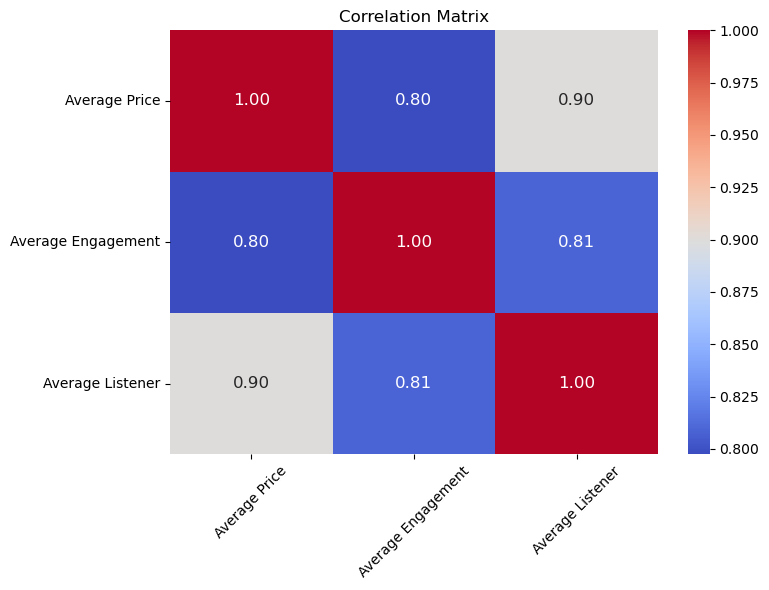

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the DataFrames
df_merged = pd.merge(df_avg_prices, df_engagement_selected, on='Festival')
df_merged = pd.merge(df_merged, normalized_df_sorted, on='Festival')

# Remove the 'Festival' column
df_merged.set_index('Festival', inplace=True)

# Calculate correlation matrix
correlation_matrix = df_merged.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
# Extract correlation coefficients
engagement_attendees_corr = correlation_matrix.loc['Average Engagement', 'Average Price']
price_attendees_corr = correlation_matrix.loc['Average Price', 'Average Listener']
listeners_attendees_corr = correlation_matrix.loc['Average Listener', 'Average Engagement']

# Print correlation coefficients
print(f"Correlation coefficient between Average Engagement and Price: {engagement_attendees_corr:.2f}")
print(f"Correlation coefficient between Average Price and Listener: {price_attendees_corr:.2f}")
print(f"Correlation coefficient between Average Listener and Engagement: {listeners_attendees_corr:.2f}")

Correlation coefficient between Average Engagement and Price: 0.80
Correlation coefficient between Average Price and Listener: 0.90
Correlation coefficient between Average Listener and Engagement: 0.81


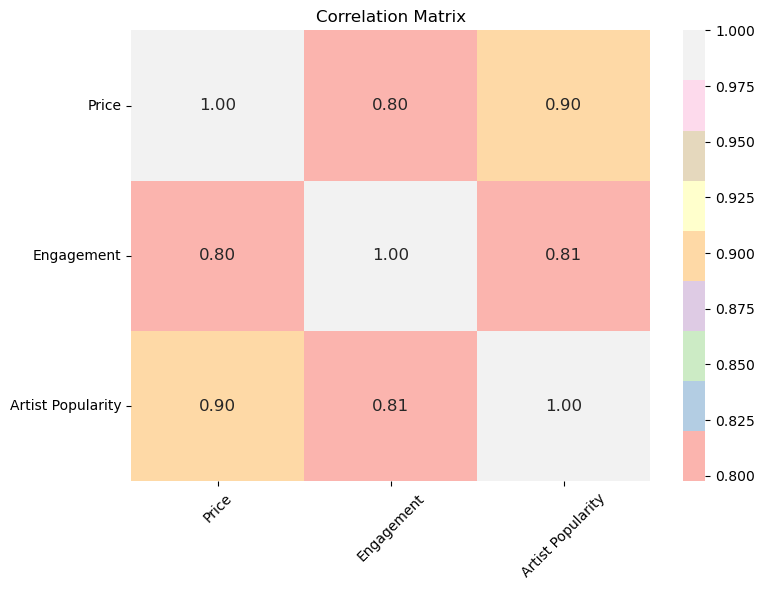

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the DataFrames
df_merged = pd.merge(df_avg_prices, df_engagement_selected, on='Festival')
df_merged = pd.merge(df_merged, normalized_df_sorted, on='Festival')

# Remove the 'Festival' column
df_merged.set_index('Festival', inplace=True)

# Rename columns
df_merged.columns = ['Price', 'Engagement', 'Artist Popularity']

# Calculate correlation matrix
correlation_matrix = df_merged.corr()

# Plot heatmap with pastel colors
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()